# Explore Weather Trends

- The first thing I did was look at the data. 
- I then used SQL to make a query on the data


## 1. Initial Query in SQL

```
-- select to match city where I live ie Los Angeles

SELECT *
FROM city_list
WHERE country like 'Los Angeles';

-- rename the tables so they are representative of the two columns I require to work with

ALTER TABLE global_data RENAME COLUMN avg_temp to global_avg_temp;
ALTER TABLE city_data RENAME COLUMN avg_temp to city_avg_temp;

-- select joining on year

SELECT global_data.year, global_data.global_avg_temp, city_avg_temp
FROM global_data INNER JOIN city_data
ON global_data.year=city_data.year
WHERE city like 'Los Angeles';
```

## This data was downloaded to a csv called 'results.csv'

## I then used pandas to import the data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Read in Data and look at head

In [37]:
df = pd.read_csv('results.csv')
df.head(3)

,year,global_avg_temp,city_avg_temp
0,1849,7.98,15.71
1,1850,7.90,15.28
2,1851,8.18,15.53


In [76]:
df.shape # 324, 6

(324, 6)

## 2. Find the moving average for the city's temperatures vs global temperatures

## I decided to use a moving average of ten years
- This was influenced by not just trial and error, but general consensus on Slack of either 5 or 10 years

In [64]:
gat = df["global_avg_temp"]
print gat.head()

0    7.98
1    7.90
2    8.18
3    8.10
4    8.04
Name: global_avg_temp, dtype: float64


In [39]:
df['global_average_temperature_moving_average'] = gat.rolling(window=10).mean()

In [63]:
print df['global_average_temperature_moving_average'].head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    8.063
Name: global_average_temperature_moving_average, dtype: float64


In [61]:
cat = df["city_avg_temp"]
print cat.head(7)

0    15.71
1    15.28
2    15.53
3    15.61
4    16.27
5    15.74
6    15.94
Name: city_avg_temp, dtype: float64


In [62]:
df['city_average_temperature_moving_average'] = cat.rolling(window=10).mean()
print df['city_average_temperature_moving_average'].head(10)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    14.781
Name: city_average_temperature_moving_average, dtype: float64


## 2a. Drop NaN values from city_moving_average and global_moving_average columns

In [52]:
gatma = df['global_average_temperature_moving_average'][9::] # account for moving average values below 10

In [51]:
sum(gatma.isnull()) # all values of gatma have values

0

In [60]:
catma = df['city_average_temperature_moving_average'][9::]
sum(catma.isnull())

0

In [123]:
df['year_moving_average'] = df['year'].rolling(window=10).mean()
print df['year_moving_average'].head(10)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    1853.1
Name: year_moving_average, dtype: float64


In [124]:
year_ma = df['year_moving_average'][9::]
sum(year_ma.isnull())

0

In [125]:
# make sure catma, gatma and year_ma are same length
len(catma) # 315
len(gatma) # 315
len(year_ma) # 315

315

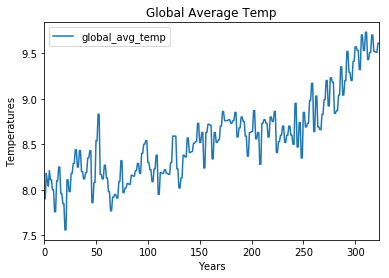

In [120]:
ga = df['global_avg_temp'].plot(title="Global Average Temp") # original global_avg_temp
ga.set(xlabel="Years", ylabel="Temperatures")
plt.legend()
plt.show()

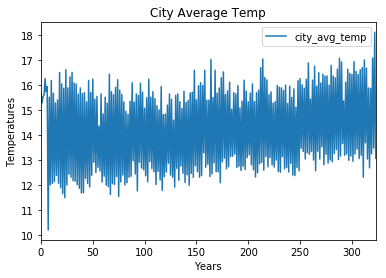

In [121]:
ca = df['city_avg_temp'].plot(title="City Average Temp") # original city_avg_temp data
ca.set(xlabel="Years", ylabel="Temperatures")
plt.legend()
plt.show()

## 3. I then plotted the data using a Line Chart

## i. Create a line chart that compares your city’s (MA) temperatures with the global (MA) temperatures

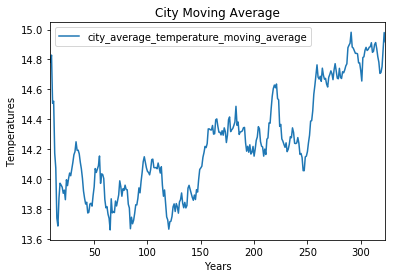

In [118]:
a = catma.plot(title="City Moving Average") # city rolling average
a.set(xlabel="Years", ylabel="Temperatures")
plt.legend()
plt.show()

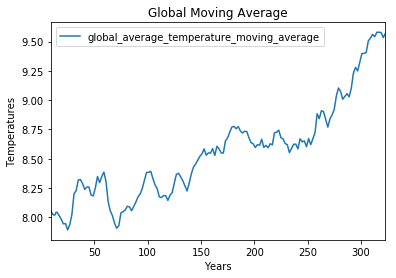

In [119]:
b = gatma.plot(title="Global Moving Average") # global rolling average 
b.set(xlabel="Years", ylabel="Temperatures")
plt.legend()
plt.show()

## Composite Plot (years and global_ma vs city_ma)

Text(0.5,1,u'Composite Plot showing Years against global MA and City MA')

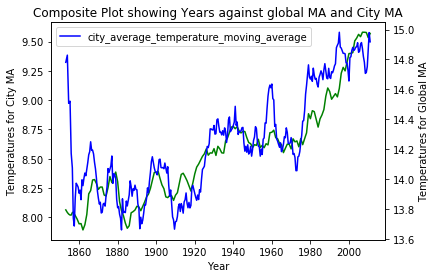

In [155]:
fig, ax1 = plt.subplots()
x = year_ma
y1 = gatma
y2 = catma

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax2.set(xlabel = "Year", ylabel="Temperatures for Global MA")
ax1.set(xlabel = "Year", ylabel="Temperatures for City MA")
plt.legend()
plt.title("Composite Plot showing Years against global MA and City MA")

## 4. Four observations I made using a Line Chart

## i. My City's overall temperatures are larger than the global average

In [86]:
## I can confirm this by checking the max of each dataframe
catma.max() # 14.98199
gatma.max() # 9.5800

9.580000000000009

##  ii. My City's least temperatures are more than the global city's

In [88]:
catma.min() # 13.6609
gatma.min() # 7.891

7.8919999999999986

## iii. My City is consistently above the global city's average temperature

this is particularly noticeable in the years between 1980 and just before 2000

## iv. There is generally more fluctuation in temperatures in the city's average vs the global average

this makes sense as my city is located in a desert terrain

## 5. Present your Findings as .pdf file